In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 190s 1us/step


In [3]:
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [4]:
# We convert them to floats and scale them to the range [0, 1] for stable tr
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


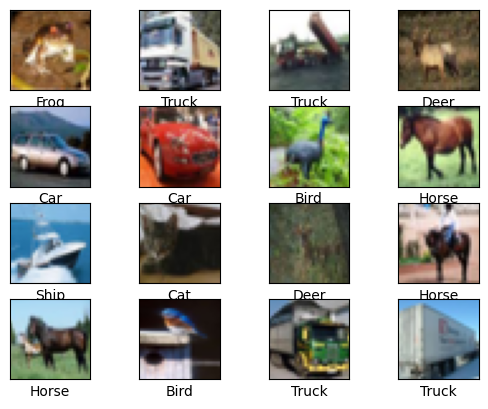

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()



# CNN model2 without flatten, instead GlobalAveragePooling2D

In [6]:
model2 = models.Sequential()
model2.add(layers.Input(shape=(32, 32, 3)))

model2.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(0.30))


#Flatten
model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,234 (8.10 MB)

 Trainable params: 2,123,210 (8.10 MB)

 Non-trainable params: 1,024 (4.00 KB)

# padding='same'

means the convolution will add extra pixels (zeros) around the edges of the image so the output feature map keeps the same width and height as the input.

-> Without it (padding='valid'), the image shrinks after each convolution because the filter can’t fully slide over the edges.

So, same = keep size, valid = shrink size

In [7]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',   # watch validation accuracy
    patience=5,               # stop after 5 epochs with no improvement
    restore_best_weights=True # rollback to the best weights
)

In [9]:
# Train model with early stopping
history1 = model2.fit(
    x_train, y_train_categorical,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test_categorical),
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
782/782 - 13s - 17ms/step - accuracy: 0.5269 - loss: 1.3511 - val_accuracy: 0.6023 - val_loss: 1.1214
Epoch 2/50
782/782 - 4s - 5ms/step - accuracy: 0.6333 - loss: 1.0374 - val_accuracy: 0.6629 - val_loss: 0.9522
Epoch 3/50
782/782 - 3s - 4ms/step - accuracy: 0.6781 - loss: 0.9144 - val_accuracy: 0.7028 - val_loss: 0.8532
Epoch 4/50
782/782 - 3s - 4ms/step - accuracy: 0.7117 - loss: 0.8159 - val_accuracy: 0.6682 - val_loss: 0.9584
Epoch 5/50
782/782 - 4s - 5ms/step - accuracy: 0.7379 - loss: 0.7423 - val_accuracy: 0.7083 - val_loss: 0.8363
Epoch 6/50
782/782 - 3s - 4ms/step - accuracy: 0.7606 - loss: 0.6769 - val_accuracy: 0.7099 - val_loss: 0.8407
Epoch 7/50
782/782 - 3s - 4ms/step - accuracy: 0.7797 - loss: 0.6244 - val_accuracy: 0.7325 - val_loss: 0.7991
Epoch 8/50
782/782 - 4s - 5ms/step - accuracy: 0.7975 - loss: 0.5689 - val_accuracy: 0.7070 - val_loss: 0.8920
Epoch 9/50
782/782 - 4s - 5ms/step - accuracy: 0.8156 - loss: 0.5211 - val_accuracy: 0.7232 - val_loss: 0.8462

Text(0.5, 0, 'epoch')

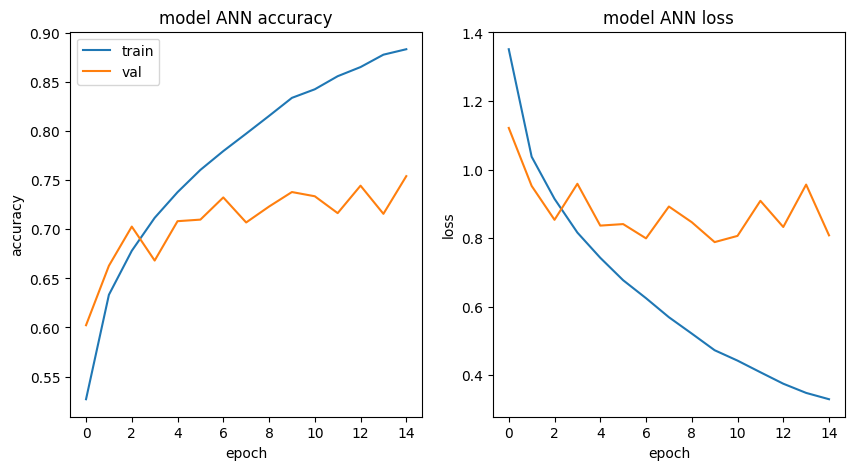

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model ANN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model ANN loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [11]:
loss, accuracy = model2.evaluate(x_test, y_test_categorical)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7476 - loss: 0.7627
Loss:0.7881379127502441
Accuracy:0.7379999756813049


In [14]:
y_pred = model2.predict(x_test)

y_out = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_out))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.85      0.86      0.85      1000
           2       0.62      0.68      0.65      1000
           3       0.51      0.60      0.55      1000
           4       0.81      0.54      0.65      1000
           5       0.60      0.67      0.63      1000
           6       0.89      0.75      0.81      1000
           7       0.76      0.81      0.79      1000
           8       0.90      0.81      0.85      1000
           9       0.81      0.85      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [12]:
model2.save("image_classifier.keras")

In [13]:
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load trained model
model = models.load_model("image_classifier.keras")

# Load and preprocess custom image
img = cv2.imread('deer.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))   # CIFAR-10 size
img_array = np.expand_dims(img, axis=0) / 255.0  # shape (1, 32, 32, 3)

# Prediction
prediction = model.predict(img_array)
index = np.argmax(prediction)

# Show result
plt.imshow(img)
plt.title(f"Prediction: {class_names[index]}")
plt.axis("off")
plt.show()
'''

'\nimport cv2\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras import models\n\n# CIFAR-10 class names\nclass_names = [\'airplane\', \'automobile\', \'bird\', \'cat\', \'deer\',\n               \'dog\', \'frog\', \'horse\', \'ship\', \'truck\']\n\n# Load trained model\nmodel = models.load_model("image_classifier.keras")\n\n# Load and preprocess custom image\nimg = cv2.imread(\'deer.jpg\')\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg = cv2.resize(img, (32, 32))   # CIFAR-10 size\nimg_array = np.expand_dims(img, axis=0) / 255.0  # shape (1, 32, 32, 3)\n\n# Prediction\nprediction = model.predict(img_array)\nindex = np.argmax(prediction)\n\n# Show result\nplt.imshow(img)\nplt.title(f"Prediction: {class_names[index]}")\nplt.axis("off")\nplt.show()\n'